   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Inco

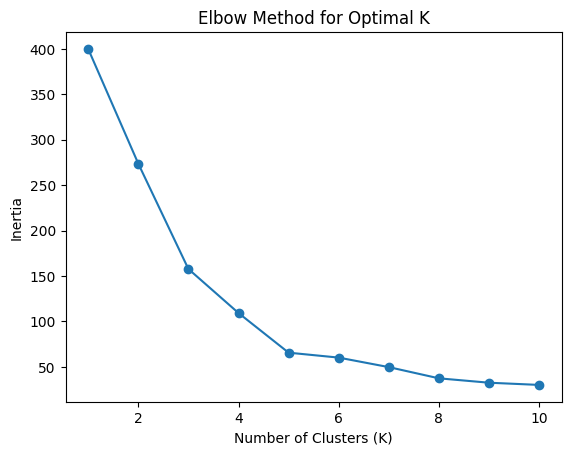

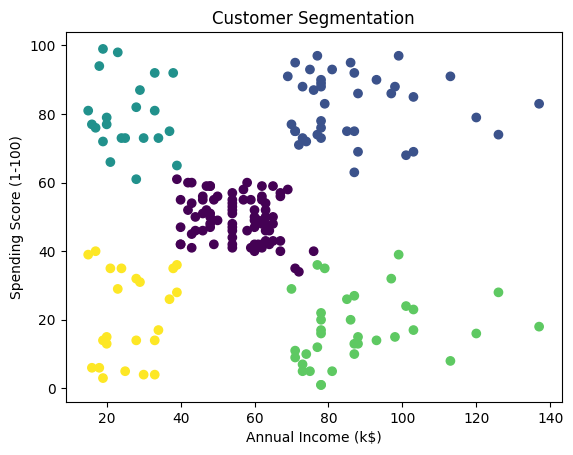

Segmented dataset saved as Mall_Customers_Segmented.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')

print(df.head())
print(df.shape)
print(df.info())
print(df.describe())

df = df.drop('CustomerID', axis=1)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

plt.figure()
plt.scatter(
    X['Annual Income (k$)'],
    X['Spending Score (1-100)'],
    c=clusters
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()

df.to_csv('Mall_Customers_Segmented.csv', index=False)

print("Segmented dataset saved as Mall_Customers_Segmented.csv")


# KMeans Customer Segmentation (Mall Dataset)

## Objective
To perform **unsupervised customer segmentation** using the KMeans clustering algorithm based on customers’ **annual income** and **spending behavior**, enabling better business and marketing strategies.

---

## Dataset
**Mall Customer Segmentation Dataset (Kaggle)**

### Key Columns Used
- `Annual Income (k$)`
- `Spending Score (1-100)`

### Columns Dropped
- `CustomerID` → Identifier only, does not contribute to clustering.

---

## Tools & Libraries
- Python  
- Pandas  
- Scikit-learn  
- Matplotlib  

---

## Workflow

### 1. Data Loading & Inspection
- Load the CSV file into a Pandas DataFrame
- Inspect shape, column names, and summary statistics
- Ensure no missing or invalid values

---

### 2. Data Preprocessing
- Drop the `CustomerID` column
- Select relevant features for clustering
- Apply **StandardScaler** to normalize feature values

**Why scaling?**  
KMeans uses Euclidean distance. Features with larger values dominate distance calculations if not scaled.

---

### 3. Finding Optimal Number of Clusters
- Run KMeans for multiple values of K (1–10)
- Store inertia values for each K
- Plot the **Elbow Curve**

**Inertia:**  
Sum of squared distances between data points and their cluster centroids.

---

### 4. Model Training
- Choose optimal K from the elbow plot
- Train final KMeans model
- Assign cluster labels to each customer

---

### 5. Visualization
- Scatter plot of:
  - X-axis → Annual Income
  - Y-axis → Spending Score
- Color-coded clusters
- Helps visually understand customer groups

---

### 6. Output
- Add cluster labels to the dataset
- Save the segmented data as a new CSV file


